In [1]:
import numpy as np

from scipy.stats import poisson

import matplotlib.pyplot as plt

from dynesty import NestedSampler


# See Example 5.3 in the notes

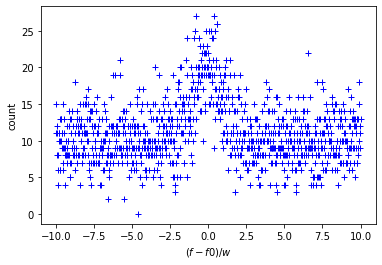

In [2]:
# load data
d=np.loadtxt("GaussianPulseSpectralData.dat")

freqs, data = d[:,0], d[:,1]

plt.plot(freqs, data, 'b+')
plt.xlabel(r'$(f-f0)/w$')
plt.ylabel(r'count')

plt.show()

# The two models

Model A: A Gaussian pulse

Model B: A Lorentzian pulse

In [3]:
def model_A(f, A, B, f0=0, w=1):
    return (A/np.pi) * (w/2) / ( (f-f0)**2 + (w/2)**2 ) + B

def model_B(f, A, B, f0=0, w=1):
    return A*np.exp(-0.5*((f-f0)/w)**2) + B

# Model A

In [4]:
def log_likelihood_A(A, B, f0=0, w=1, f=freqs, d=data):
    m = model_A(f, A, B, f0=f0, w=w)
    return np.sum(poisson(m).logpmf(d))


In [5]:
ndim = 2

def prior_transform_A(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameters of interest:
    A = Unif[8,12)]
    B = Unif[8,12)"""

    x = 6. * u + 8.  # scale and shift 
    
    return x

def log_likelihood_wrapperA(x):
    return log_likelihood_A(x[0], x[1])

samplerA = NestedSampler(log_likelihood_wrapperA, prior_transform_A, ndim, 
                        nlive=1024, bound='multi', sample='slice')

samplerA.run_nested(dlogz=0.1)



9420it [03:22, 46.41it/s, +1024 | bound: 31 | nc: 1 | ncall: 321200 | eff(%):  3.252 | loglstar:   -inf < -2666.406 <    inf | logz: -2673.260 +/-  0.105 | dlogz:  0.000 >  0.100]


In [6]:
logZ_A = samplerA.results.logz[-1]
print("log-evidence log(Z_A) =", logZ_A)

log-evidence log(Z_A) = -2673.2604479574657


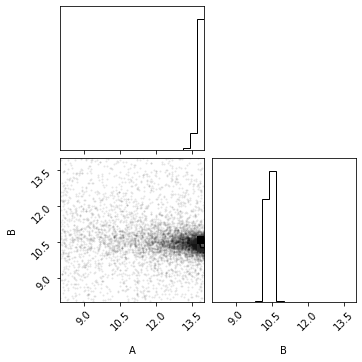

In [7]:
samples_A = samplerA.results.samples
weights_A = samplerA.results.logwt

from corner import corner

corner(samples_A, weights=np.exp(weights_A-max(weights_A)), labels=['A', 'B'])
plt.show()

# Model B

In [8]:
def log_likelihood_B(A, B, f0=0, w=1, f=freqs, d=data):
    m = model_B(f, A, B, f0=f0, w=w)
    return np.sum(poisson(m).logpmf(d))


In [9]:
ndim = 2

def prior_transform_B(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameters of interest:
    A = Unif[8,12)]
    B = Unif[8,12)"""

    x = 4. * u + 8.  # scale and shift 
    
    return x

def log_likelihood_wrapperB(x):
    return log_likelihood_B(x[0], x[1])

samplerB = NestedSampler(log_likelihood_wrapperB, prior_transform_B, ndim, 
                        nlive=1024, bound='multi', sample='slice')

samplerB.run_nested(dlogz=0.1)



6510it [02:08, 50.58it/s, +1024 | bound: 15 | nc: 1 | ncall: 174497 | eff(%):  4.318 | loglstar:   -inf < -2614.517 <    inf | logz: -2618.523 +/-  0.077 | dlogz:  0.000 >  0.100]


In [10]:
logZ_B = samplerB.results.logz[-1]
print("log-evidence log(Z_B) =", logZ_B)

log-evidence log(Z_B) = -2618.5233186574255


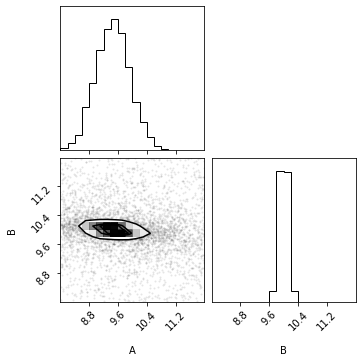

In [11]:
samples_B = samplerB.results.samples
weights_B = samplerB.results.logwt

from corner import corner

corner(samples_B, weights=np.exp(weights_B-max(weights_B)), labels=['A', 'B'])
plt.show()


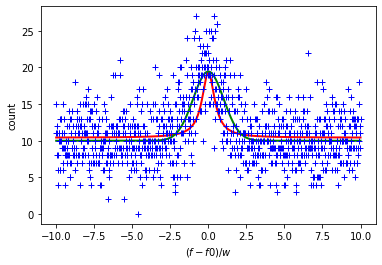

In [12]:
idx_max_A = np.argmax(samplerA.results.logl)
idx_max_B = np.argmax(samplerB.results.logl)

plt.plot(freqs, model_A(freqs, *samples_A[idx_max_A]), lw=2, color='r', label='maxL model A')
plt.plot(freqs, model_B(freqs, *samples_B[idx_max_B]), lw=2, color='g', label='maxL model B')

plt.plot(freqs, data, 'b+', label='data')
plt.xlabel(r'$(f-f0)/w$')
plt.ylabel(r'count')

plt.legend()
plt.show()

# Posterior Odds Ratio
Let us assume equal prior odds; i.e. P(A)=P(B)=1/2.

In [13]:
# Odds ratio O_{A,B}
logO_AB = logZ_A-logZ_B
print("log(O_{A,B}) =", logO_AB)

log(O_{A,B}) = -54.737129300040124


As this is strongly negative, there is clear evidence in favour of model B. This was not obvious just from looking at the data!